# 1. Selecting Data 
## 1.1 Role of data
    Describe relationship between data <---> model, discussion about source, local,regional,global data, quality,etc 


## 1.2 Selecting data 
### 1.2.1 Sources
```{admonition} Berkeley Earth Global Temperature
:class: dropdown

- Daily  average temperature observations
- Resolution 1° x  1°
- [Source](https://berkeleyearth.org/data/)
- [License](https://berkeleyearth.org/data/)
```
```{admonition} NOAA GHCN: Nenana 
:class: dropdown

- NENANA MUNICIPAL AIRPORT, AK US (USW00026435)
    - Rainfall 
    - Snowfall
    - Snow-depth
- [Source](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND)
- [License](https://www.google.com/)
```

```{admonition} NOAA GHCN: Fairbanks
:class: dropdown

- FAIRBANKS INTERNATIONAL AIRPORT, AK US (USW00026411)
    - Rainfall 
    - Snowfall
    - Snow-depth
    - Air temperature
    - Average wind speed

- [Source](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND)
- [License](https://www.google.com/)
```

```{admonition} USGS Water Data: Nenana
:class: dropdown

- USGS 15515500 TANANA R AT NENANA AK
    - Mean water temperature
    - Mean discharge

- [Source](https://waterdata.usgs.gov/nwis/rt)
- [License](https://www.google.com/)
```

```{admonition} USGS Water Data: Fairbanks
:class: dropdown

- USGS 15485500 Tanana R at Fairbanks AK
    - Mean water temperature
    - Mean discharge
- [Source](https://waterdata.usgs.gov/nwis/rt)
- [License](https://www.google.com/)
```

```{admonition} USGS Water Data: Fairbanks
:class: dropdown

- USGS 15485500 Tanana R at Fairbanks AK
    - Mean water temperature
    - Mean discharge
- [Source](https://waterdata.usgs.gov/nwis/rt)
- [License](https://www.google.com/)
```
```{admonition} NERC-EDS  Global Cloud Coverage
:class: dropdown

- Global Cloud coverga percentage 
- Resolution 2° x  2°
- [Source](https://catalogue.ceda.ac.uk/uuid/5fda109ab71947b6b7724077bf7eb753?search_url=%2F%253Fq%253DCRU%2BTS4.07%2BCloud%2BCover%2B%26results_per_page%253D20%26sort_by%253Drelevance%26objects_related_to_uuid%253D%26geo_option%253DTrue%26north_bound%253D%26west_bound%253D%26east_bound%253D%26south_bound%253D%26start_date%253D%26end_date%253D%26date_option%253Dpublication_date%26start_date_pub%253D%26end_date_pub%253D) accessed through [KNMI](https://climexp.knmi.nl/select.cgi?id=someone@somewhere&field=cru4_cld_10)
- [License](https://www.google.com/)
```
```{admonition} TEMIS Global Solar Surface Irradiance
:class: dropdown

- Broadband Solar Surface Irradiance(0.2-4.0 micron)
- Resolution 2° x  2°
- [Source](https://www.temis.nl/fresco/) accessed through [KNMI](https://climexp.knmi.nl/select.cgi?id=someone@somewhere&field=fresco6_ssi)
- [License](https://www.google.com/)
```
```{admonition} USGS Glaciers Data: Gulkana
:class: dropdown

- Gulkana weather station (USGS 15478038) 
    - Air Temperature 
    - Precipitation
    - Glacier-wide mass balance
- [Source](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND)
- [License](https://www.google.com/)
```

```{admonition} NOAA Global Indexes
:class: dropdown
 
- ENSO-Southern oscillation index
- Pacific decadal oscillation index
- Artic oscillation
- [Source](https://www.ncei.noaa.gov/access/monitoring/products/)
- [License](https://www.google.com/)
```

```{admonition} Nenana Ice Classic
:class:dropdown
 
- Ice thickness measurements<!--  -->
- Ice break up dates
```

> we see the seasonality, we could compute the autocorrelation function and PSD but we have 'zero-clipping' ( we can directly see it in the  time-series plot and unusual density distribution - weighted towards zero) in quite a few of time-series so the result wont be very accurate( we need to treat each column independently and drop rows without data).

> Here we could also integrate the Extreme Value analysis section
### 1.2.2

:::{Ex 1 }
> we need to explain why using dataframes instead of numpy
The data files are in [`temp_loc`], choose a file, import it and set the index to a datetime object. And make simple plot

> Introduces useful pandas methods such as 
    > `pd.read_csv` ( add header and metadata so they have to look for [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) for `skip_row`, `index_col`)
    > pd.index=pd.to_datetime() 
:::

:::{Ex 2}
Repeat Ex 1 but using another dataset. Now combine them using 
 `pd.merge` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html) 
 > special attentions to left,right and outer merge method

:::


> Explain that we have done the work for them and we already have a formatted dataframe with all the data
### 1.2.3 Exploring dataframe
     Explain that as a engineer/geoscientist we have to take decisions regarding model complexity data sources, etc. 

To facilitate this, the following interactive map show the geographical location where the data was collected respect to out system of interest ( the tripod)

```{warning}
:class: tip, dropdown
I haven't figured out how to load the plot. The plot was created using plotly, but when building the books is does not render correctly, similarly  embedding the HTML of the plot in a md cell does not work either, the file is called 'Geo_tag_stations.html` the code use to crete the plot is `Model.ipynb`. see more in the issue in [github](https://github.com/iceclassic/mude/issues/9)  
``` 

We have also created a function called `explore_data` that plot the contents of the dataframe

:::{Ex 3}
Using the information from the plots select(mention) which variables/ data are relevant for our model. Explain
:::





<iframe src="Geo_tag_stations.html" width="100%" height="600"></iframe>


In [1]:
from funciones import*
import pandas as pd
from importlib import reload

Data=pd.read_csv("../../Data/Time_series_DATA.txt",skiprows=149,index_col=0)
#Data=pd.read_csv('https://raw.githubusercontent.com/iceclassic/sandbox/main/Data/Time_series_DATA.txt',index_col=0,skiprows=149)
Data.index = Data.index.astype(str).str.split().str[0]
Data.index = pd.to_datetime(Data.index, format="%Y-%m-%d")

Data = Data[(Data.index.year >= 1915) & (Data.index.year < 2024)]
Data=Data.drop(columns=['Days since start of year','Predicted ice thickness [m]','Noisy predicted ice thickness [m]'])


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40413 entries, 1915-01-01 to 2023-12-31
Data columns (total 23 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Regional: Air temperature [C]                      38563 non-null  float64
 1   Days until break up                                38563 non-null  float64
 2   Nenana: Rainfall [mm]                              29516 non-null  float64
 3   Nenana: Snowfall [mm]                              19945 non-null  float64
 4   Nenana: Snow depth [mm]                            15984 non-null  float64
 5   Nenana: Mean water temperature [C]                 2418 non-null   float64
 6   Nenana: Mean Discharge [m3/s]                      22525 non-null  float64
 7   Nenana: Air temperature [C]                        31146 non-null  float64
 8   Fairbanks: Average wind speed [m/s]                9797 non-null   fl

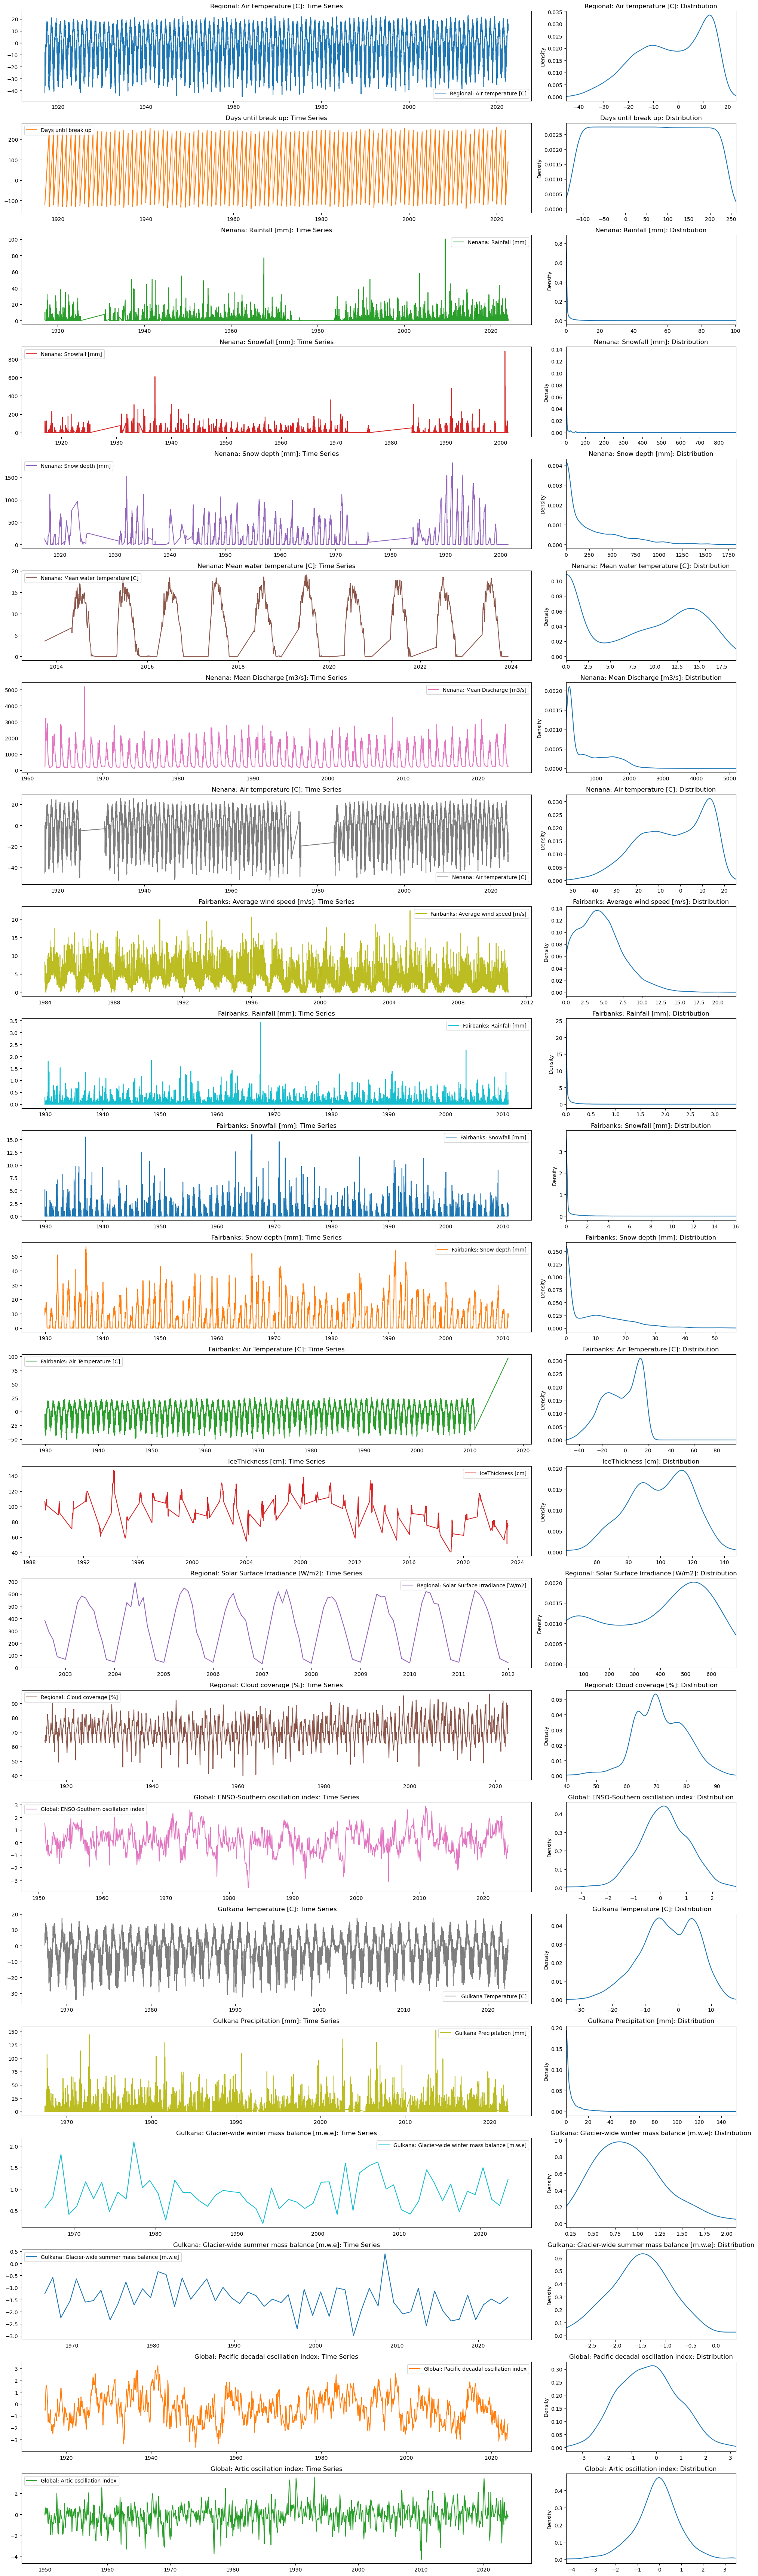

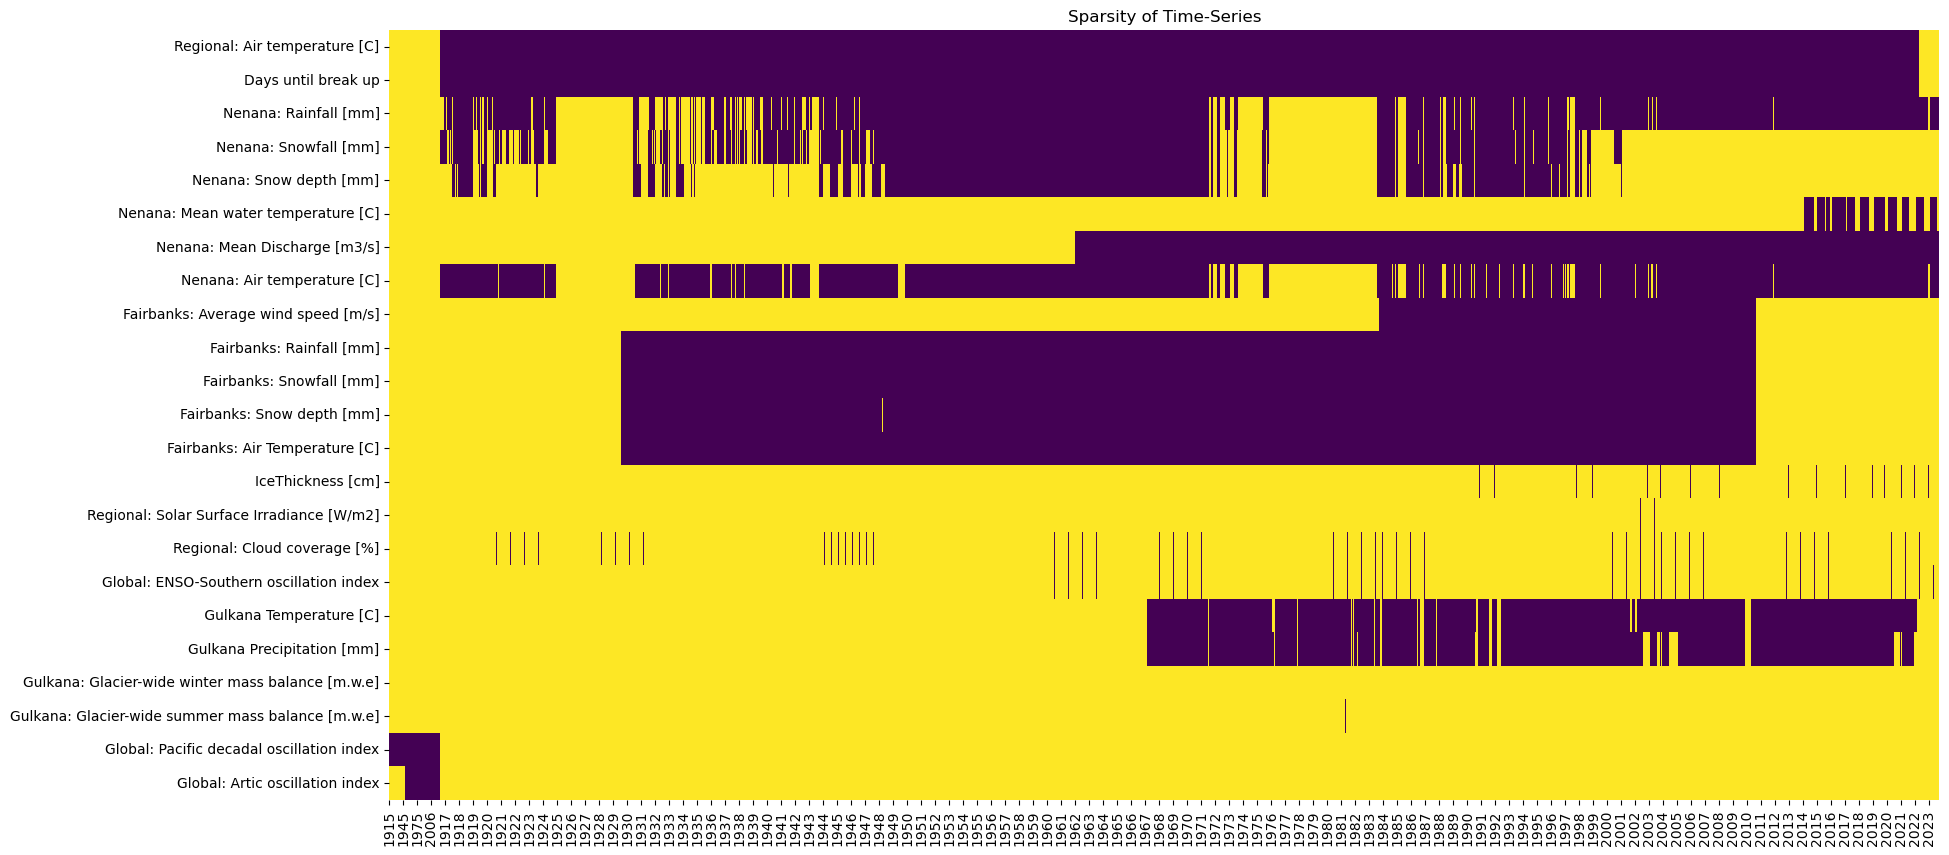

In [2]:
explore_contents(Data)

::: Ex 4

Some of you may have noticed that we have three different columns with temperature observation, should we consider all of them ? Use the function `compare_columns` and justify your decision

:::

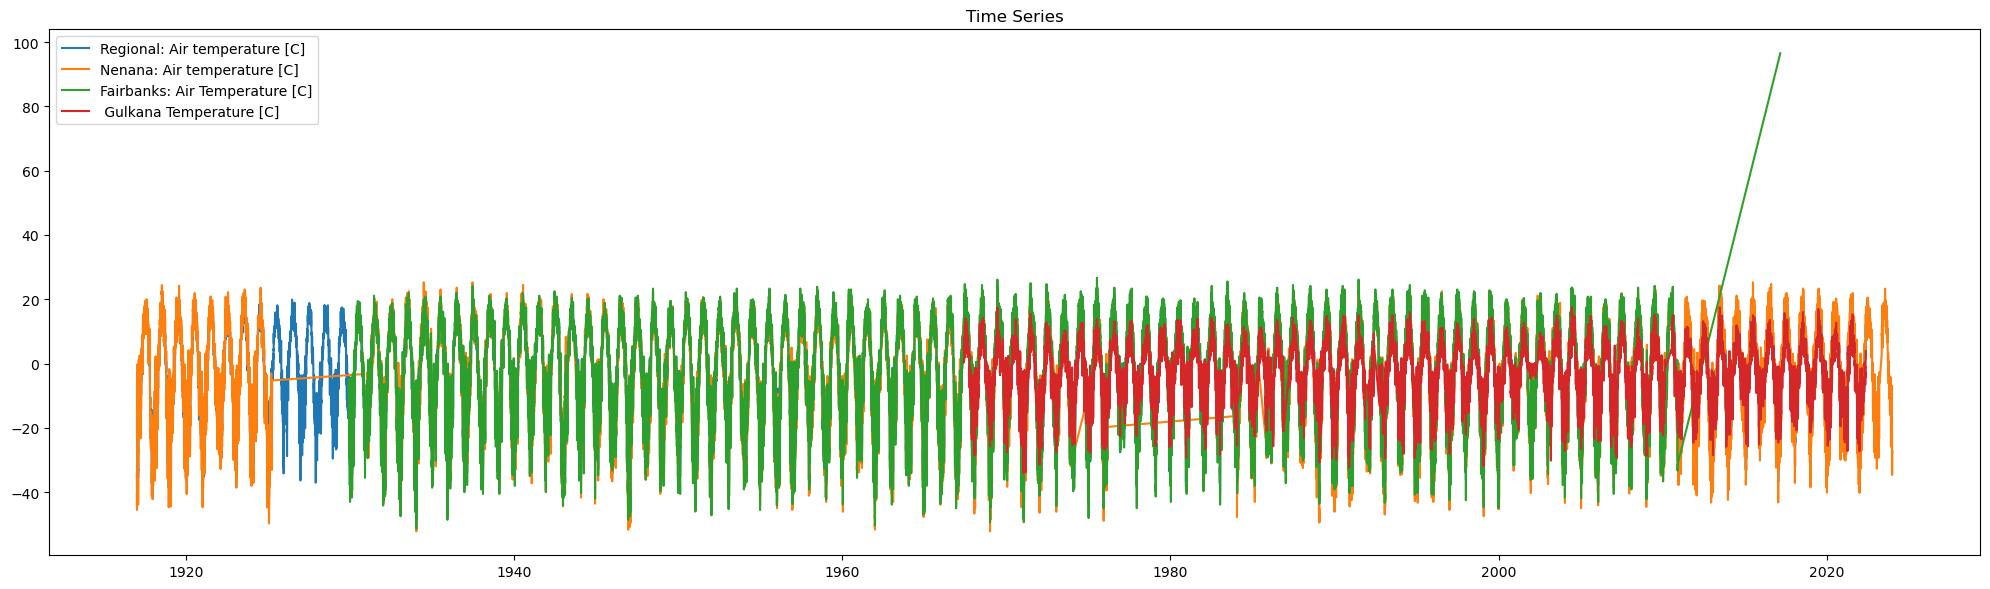

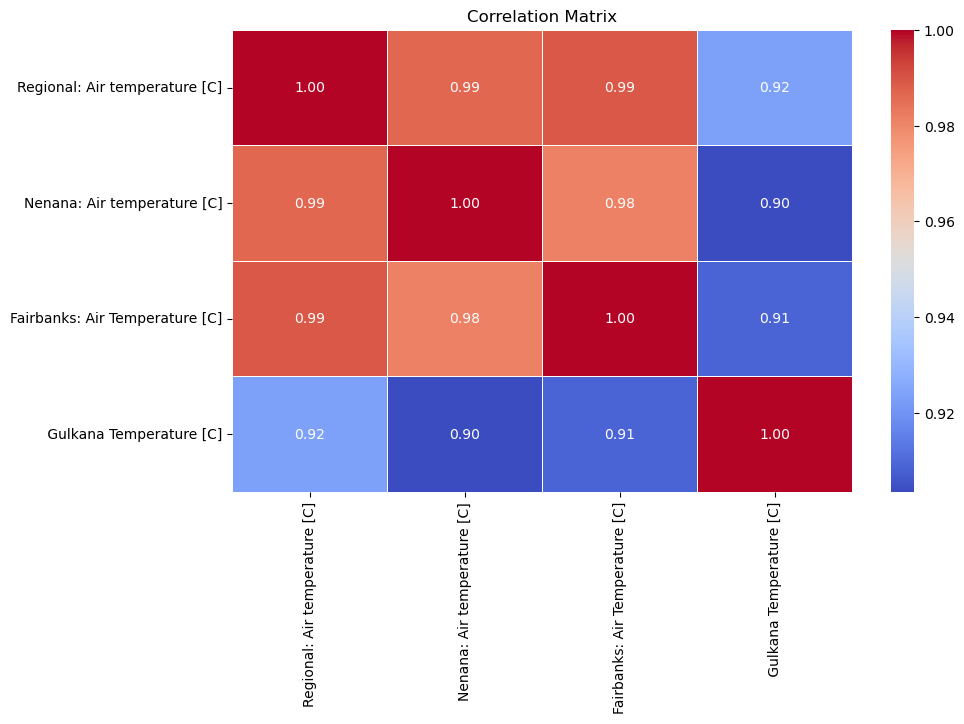

In [3]:
temperature_columns=['Regional: Air temperature [C]','Nenana: Air temperature [C]','Fairbanks: Air Temperature [C]',' Gulkana Temperature [C]']
compare_columns(Data,temperature_columns,correlation=True)

> The information in columns is almost the same

::: Ex 5
We have decided that we only need the temperature from the column `Regional: Air Temperature [C]` as is has the same information as the other columns and has more data point ( more range and consistent sampling).

Use the pandas method `.drop`to  eliminate the unnecessary columns 

( What about Gulkana Temperature??? )

:::

In [4]:
Data=Data.drop(columns=temperature_columns[1:])

Lets do the same for Rainfall, Snowfall

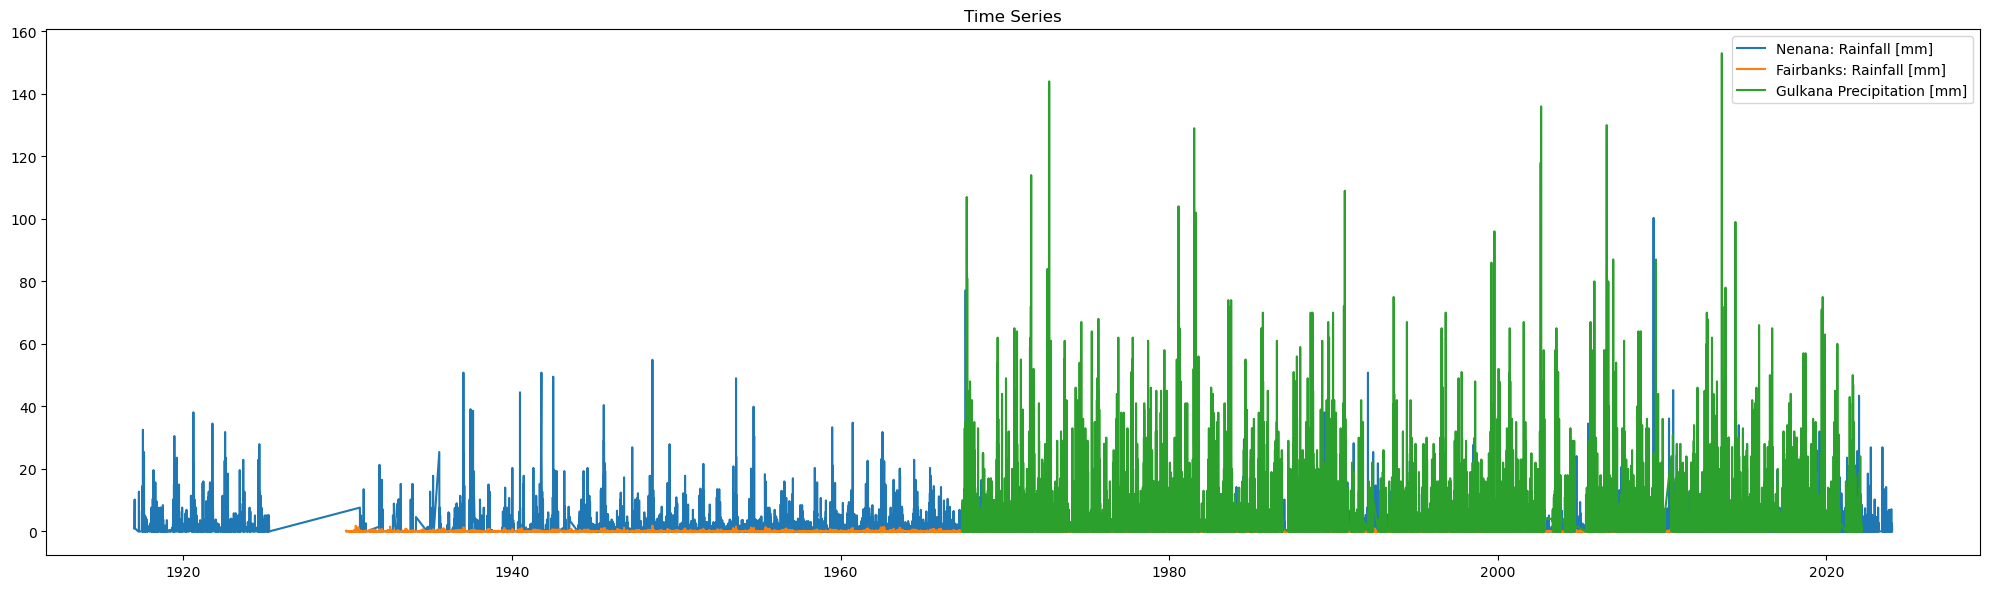

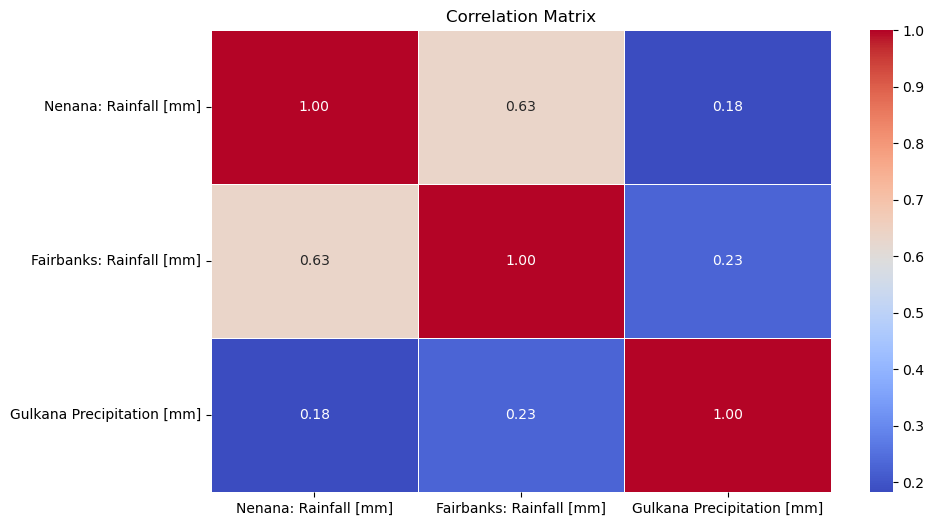

In [5]:
rain_columns=['Nenana: Rainfall [mm]' ,'Fairbanks: Rainfall [mm]','Gulkana Precipitation [mm]']
compare_columns(Data,rain_columns,correlation=True)

Perfect, the columns do not to reflect the same phenomena, firstly,  see the difference between precipitation and rainfall is it the same? Secondly, the rainfall in Nenana and Fairbanks seem to be uncorrelated, should we drop the column related to Fairbanks and Gulkana glacier then, as we care about Nenana? Maybe, both location are upriver from Nenana and rainfall might have and effect on the melting of the ice downstream. For the moment, we will drop this column but we will re-examine this decision later on



> here could pivot to coherence autocorrelation and PSD

In [6]:
Data=Data.drop(columns=rain_columns[1:])

::: Ex6
Lets re-examine the sparcity plot obtained form `explore_content`.
Some columns have a very different smaplign frequency and number of observtion thatn others. Use the `drop`method to eliminate variables that have very dissimilar characterisicts 
:::

In [7]:
sparse_columns=['Regional: Solar Surface Irradiance [W/m2]','Regional: Cloud coverage [%]','Global: ENSO-Southern oscillation index','Gulkana: Glacier-wide winter mass balance [m.w.e]','Gulkana: Glacier-wide summer mass balance [m.w.e]','Global: Pacific decadal oscillation index','Global: Artic oscillation index']
Data=Data.drop(columns=sparse_columns)

::: Ex7
Lets simplify it  even more our dataset, and consider only the data staring from 1950. Use [indexign](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)  ( here put example as the doc is very extensive). Remember that the date of the observation is in the index
:::


In [8]:
Data = Data[(Data.index.year >= 1950)]

From  the output of the functions we can observe:
1. Different columns have different 'sampling frequencies' and span different intervals
        -> Resampling
        -> Interpolation
        -> Data Augmentation

2. The data is not stationary, strong seasonality
    -> Discuss source of this?
        -physics behind this local,regional and global  oscillation.
        - pivot to PSD and BLUE



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27916 entries, 1950-01-01 to 2023-12-31
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Regional: Air temperature [C]        26510 non-null  float64
 1   Days until break up                  26510 non-null  float64
 2   Nenana: Rainfall [mm]                22235 non-null  float64
 3   Nenana: Snowfall [mm]                13322 non-null  float64
 4   Nenana: Snow depth [mm]              12965 non-null  float64
 5   Nenana: Mean water temperature [C]   2418 non-null   float64
 6   Nenana: Mean Discharge [m3/s]        22525 non-null  float64
 7   Fairbanks: Average wind speed [m/s]  9797 non-null   float64
 8   Fairbanks: Snowfall [mm]             22250 non-null  float64
 9   Fairbanks: Snow depth [mm]           22250 non-null  float64
 10  IceThickness [cm]                    461 non-null    float64
dtypes: float64(

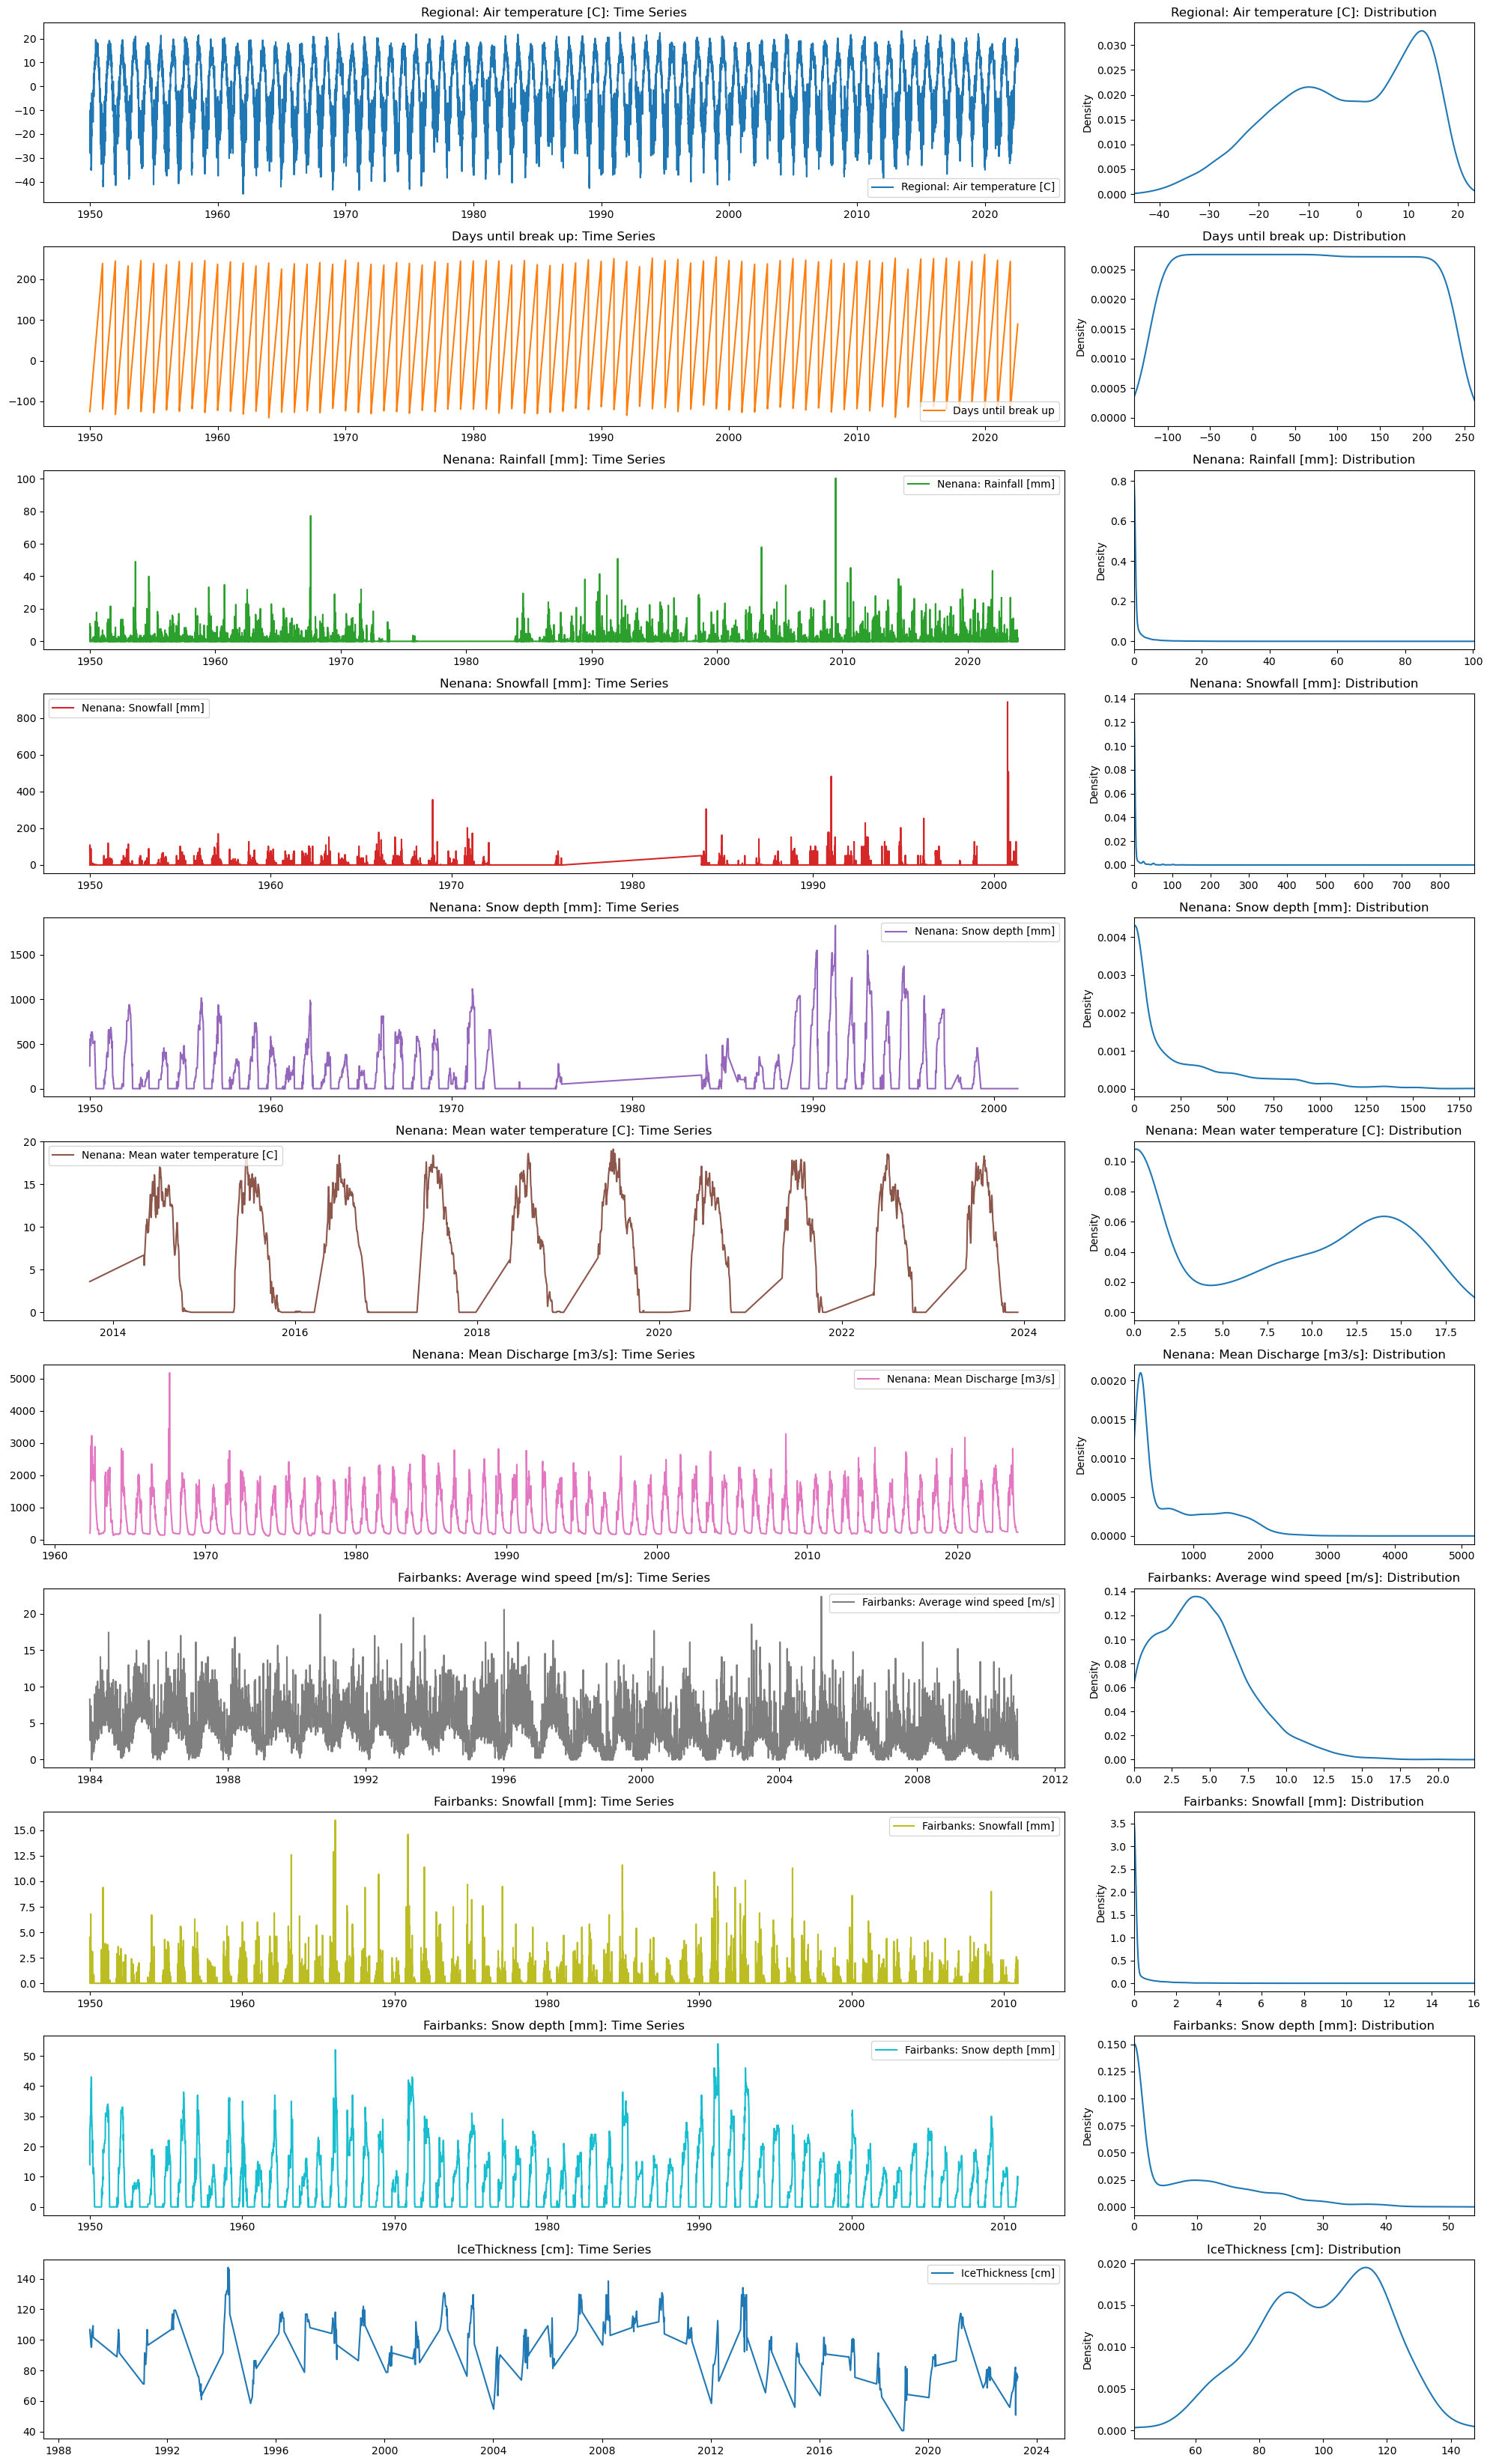

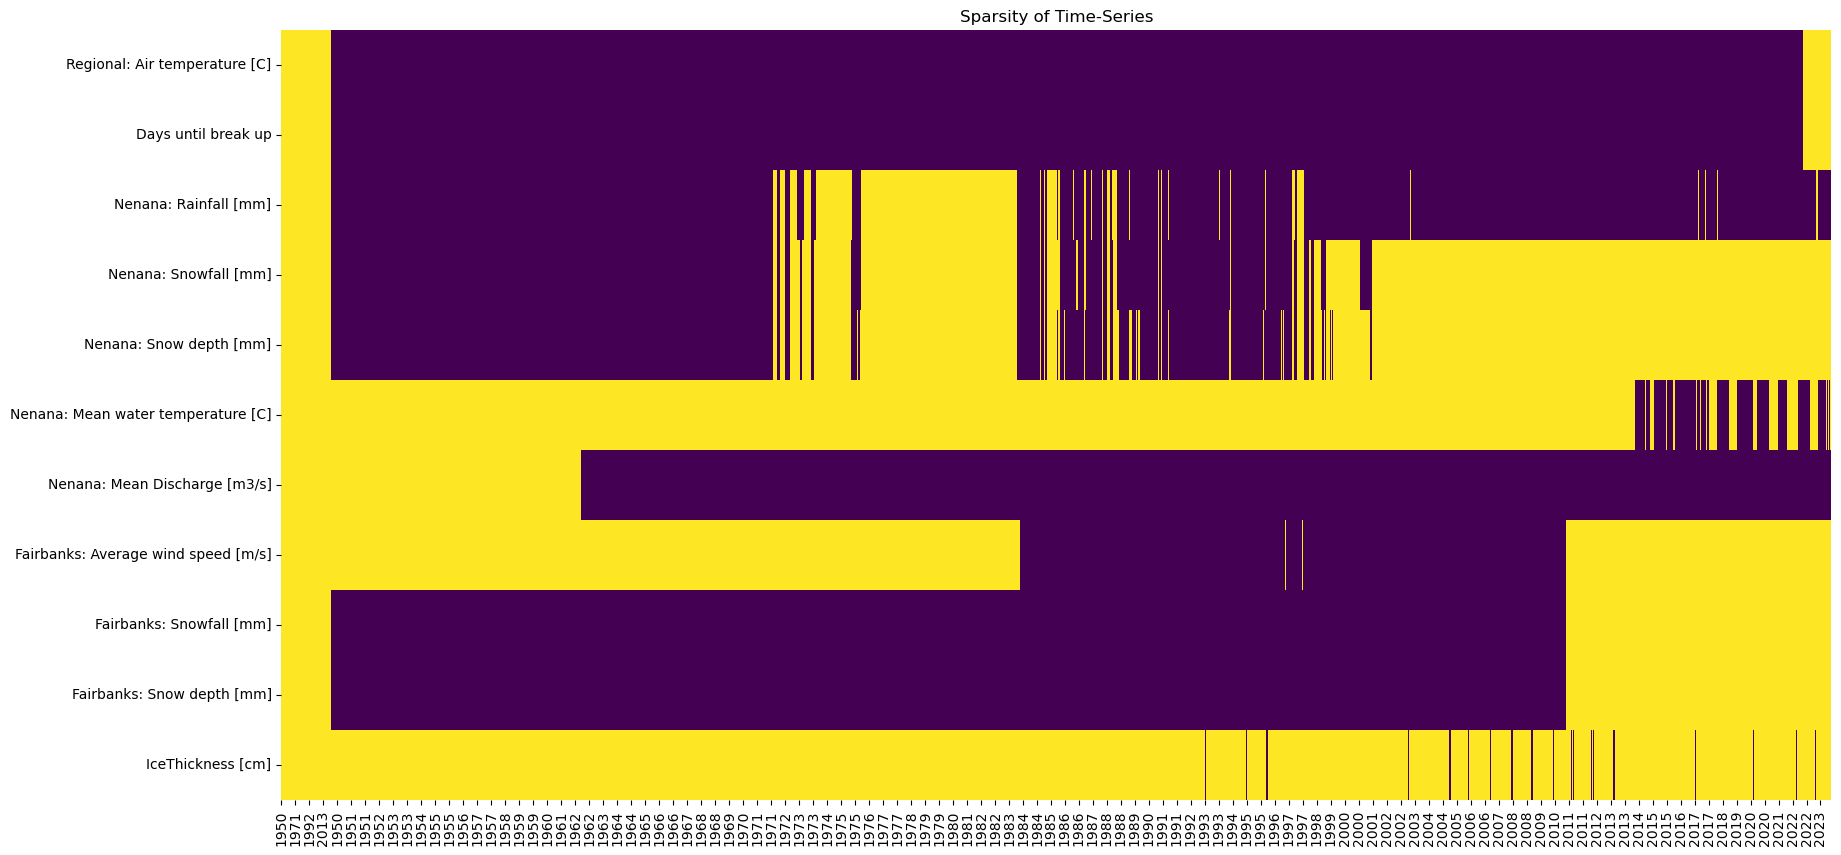

In [9]:
explore_contents(Data)